In [44]:
import pandas as pd 
import numpy as np 
import string 
import spacy 
from matplotlib.pyplot import imread 
from matplotlib import pyplot as plt 
%matplotlib inline 
from wordcloud import wordcloud

In [45]:
!python -m spacy download en_core_web_sm

2022-10-26 22:32:46.916273: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-26 22:32:46.936199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 22:35:03.316274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-26 22:35:03.318114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-10-26 22:35:03.319818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-10-26 22:35:03.321527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cufft64_10.dll'; dlerror: cufft64_10.dll not found
2022-10-26 22:35:03.323222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'curand64_10.dll'; dlerror: curand64_10.dll not found
2022-10-26 22:35:03.325283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusolver64_11.dll'; dlerror: cusolver64_11.dll not found
2022-10-26 22:35:03.327240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dy

In [46]:
import pandas as pd  


In [47]:
review=pd.read_csv("amazon_uk_shoes_products_dataset.csv",encoding='latin1',error_bad_lines = False)
review

C:\Users\rajee\AppData\Local\Temp\ipykernel_2520\3660061933.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  review=pd.read_csv("amazon_uk_shoes_products_dataset.csv",encoding='latin1',error_bad_lines = False)


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25
...,...,...,...,...,...,...,...,...,...,...,...
6818,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Menâs Low-Top Sneakers, ...",mauti72,Schick und leicht,"Schicker Schuh, lÃ¤uft sich gut.",5.0,True,Reviewed in Germany on 15 October 2020,NaN,0850eae1-fa2f-59e6-bf30-ad49151bfa20,24/12/2021 02:29:39
6819,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Menâs Low-Top Sneakers, ...",Charles Lechesnier,EXCELLENT,Mieux que je ne l'imaginais. TrÃ¨s bonne taill...,5.0,True,Reviewed in France on 23 August 2020,NaN,4bf117ed-ea7c-517c-967c-2aee3f80ed29,24/12/2021 02:29:39
6820,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Rebecca LÃ¼tzenkirchen,Einfach schÃ¶ne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,Reviewed in Germany on 4 October 2021,NaN,5b129eb2-a438-5377-9c46-217a177615b2,24/12/2021 02:29:39
6821,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Sergej Friedel,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,Reviewed in Germany on 31 January 2021,NaN,91144305-98db-5a55-8ec4-16a253beb811,24/12/2021 02:29:39


In [48]:
reviews=pd.DataFrame()
reviews['x']=review.review_text.astype('str')
reviews=reviews.iloc[0:3000,]
reviews

,x
0,Love these. Was looking for converses and thes...
1,"The shoes are very cute, but after the 2nd day..."
2,Good quality
3,Great
4,Ho scelto il modello bianco con rifinitura die...
...,...
2995,"Super cute, high quality UGG slippers with non..."
2996,There great ð
2997,The footbed is very firm. Returned these to g...
2998,Unlike other UGG slippers I've purchased this ...


In [49]:
#remove both the leading and the trailing characters
reviews= [x.strip() for x in reviews.x]
# removes empty strings, because they are considered in Python as False
reviews=[x for x in reviews if x] 

reviews[0:10]

['Love these. Was looking for converses and these were half the price and so uniqueâ\x80\x94 Iâ\x80\x99ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.',
 'The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping. After the 3rd day of wearing them the plastic on the side ripped. They could have ripped bc I was wearing them to work and I do a lot of walking at work. If youâ\x80\x99re going to buy these I donâ\x80\x99t recommend wearing them on days where you will do a lot of walking or they might rip',
 'Good quality',
 'Great',
 'Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora piÃ¹ belle, il mio numero Ã¨ 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco Ã¨ arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in piÃ¹.',
 'Sono solita comprare scarpe Gues

In [50]:
#joining the text into one string/text
text=' '.join(reviews)
text

'Love these. Was looking for converses and these were half the price and so uniqueâ\x80\x94 Iâ\x80\x99ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it. The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping. After the 3rd day of wearing them the plastic on the side ripped. They could have ripped bc I was wearing them to work and I do a lot of walking at work. If youâ\x80\x99re going to buy these I donâ\x80\x99t recommend wearing them on days where you will do a lot of walking or they might rip Good quality Great Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora piÃ¹ belle, il mio numero Ã¨ 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco Ã¨ arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in piÃ¹. Sono solita comprare scarpe Guess e non ho mai avuto 

In [51]:
#punctation
no_punc_text=text.translate(str.maketrans(' ',' ',string.punctuation))
no_punc_text


'Love these Was looking for converses and these were half the price and so uniqueâ\x80\x94 Iâ\x80\x99ve never seen clear shoes like these they fit great The plastic takes a little getting used to but the style is so worth it The shoes are very cute but after the 2nd day of wearing them the tongue started ripping After the 3rd day of wearing them the plastic on the side ripped They could have ripped bc I was wearing them to work and I do a lot of walking at work If youâ\x80\x99re going to buy these I donâ\x80\x99t recommend wearing them on days where you will do a lot of walking or they might rip Good quality Great Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora piÃ¹ belle il mio numero Ã¨ 38 385 ed ho ordinato il numero 38 e mi va beneSpedizione veloce il pacco Ã¨ arrivato anche prima del previsto prezzo ottimo dato che in giro costano almeno 10 15 euro in piÃ¹ Sono solita comprare scarpe Guess e non ho mai avuto problemi con la t

In [52]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Love', 'these', 'Was', 'looking', 'for', 'converses', 'and', 'these', 'were', 'half', 'the', 'price', 'and', 'so', 'uniqueâ\x80\x94', 'Iâ\x80\x99ve', 'never', 'seen', 'clear', 'shoes', 'like', 'these', 'they', 'fit', 'great', 'The', 'plastic', 'takes', 'a', 'little', 'getting', 'used', 'to', 'but', 'the', 'style', 'is', 'so', 'worth', 'it', 'The', 'shoes', 'are', 'very', 'cute', 'but', 'after', 'the', '2nd', 'day']


In [53]:
len(text_tokens)

107442

In [54]:
#Remove Stopword
from nltk.corpus import stopwords
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
stopwords=pd.read_csv("stop.txt")
my_stop_words.extend(stopwords)
no_stop_token=[word for word in text_tokens if not word in my_stop_words ]
print(no_stop_token[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Love', 'Was', 'looking', 'converses', 'half', 'price', 'uniqueâ\x80\x94', 'Iâ\x80\x99ve', 'never', 'seen', 'clear', 'shoes', 'like', 'fit', 'great', 'The', 'plastic', 'takes', 'little', 'getting', 'used', 'style', 'worth', 'The', 'shoes', 'cute', '2nd', 'day', 'wearing', 'tongue', 'started', 'ripping', 'After', '3rd', 'day', 'wearing', 'plastic', 'side', 'ripped', 'They']


In [55]:
#Noramalize the data
lower_words = [text.lower() for text in no_stop_token]
print(lower_words[0:25])

['love', 'was', 'looking', 'converses', 'half', 'price', 'uniqueâ\x80\x94', 'iâ\x80\x99ve', 'never', 'seen', 'clear', 'shoes', 'like', 'fit', 'great', 'the', 'plastic', 'takes', 'little', 'getting', 'used', 'style', 'worth', 'the', 'shoes']


In [56]:
#steaming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['love', 'wa', 'look', 'convers', 'half', 'price', 'uniqueâ\x80\x94', 'iâ\x80\x99v', 'never', 'seen', 'clear', 'shoe', 'like', 'fit', 'great', 'the', 'plastic', 'take', 'littl', 'get', 'use', 'style', 'worth', 'the', 'shoe', 'cute', '2nd', 'day', 'wear', 'tongu', 'start', 'rip', 'after', '3rd', 'day', 'wear', 'plastic', 'side', 'rip', 'they']
['love', 'wa', 'look', 'convers', 'half', 'price', 'uniqueâ\x80\x94', 'iâ\x80\x99v', 'never', 'seen', 'clear', 'shoe', 'like', 'fit', 'great', 'the', 'plastic', 'take', 'littl', 'get', 'use', 'style', 'worth', 'the', 'shoe', 'cute', '2nd', 'day', 'wear', 'tongu', 'start', 'rip', 'after', '3rd', 'day', 'wear', 'plastic', 'side', 'rip', 'they']


In [57]:
#NLP english language model of spacy library
nlp=spacy.load('en_core_web_sm')
nlp

In [58]:
# lemmas being one of them, but mostly POS, which will follow later
doc=nlp(' '.join(no_stop_token))
print(doc[0:40])

Love Was looking converses half price uniqueâ Iâve never seen clear shoes like fit great The plastic takes little getting used style worth The shoes cute 2nd day wearing tongue started ripping After 3rd day wearing plastic side ripped They


In [59]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['love', 'be', 'look', 'converse', 'half', 'price', 'uniqueâ\x80\x94', 'Iâ\x80\x99ve', 'never', 'see', 'clear', 'shoe', 'like', 'fit', 'great', 'the', 'plastic', 'take', 'little', 'get', 'use', 'style', 'worth', 'the', 'shoe']


# Feature Extraction

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [61]:
print(vectorizer.vocabulary_)

{'love': 5736, 'be': 1197, 'look': 5706, 'converse': 2297, 'half': 4556, 'price': 7403, 'uniqueâ': 10125, 'iâ': 5126, 've': 10287, 'never': 6414, 'see': 8472, 'clear': 1977, 'shoe': 8619, 'like': 5610, 'fit': 3835, 'great': 4422, 'the': 9632, 'plastic': 7180, 'take': 9490, 'little': 5646, 'get': 4242, 'use': 10217, 'style': 9318, 'worth': 10829, 'cute': 2471, '2nd': 144, 'day': 2571, 'wear': 10608, 'tongue': 9801, 'start': 9164, 'rip': 8075, 'after': 521, '3rd': 185, 'side': 8689, 'they': 9661, 'could': 2366, 'bc': 1195, 'work': 10812, 'lot': 5730, 'walk': 10540, 'if': 4858, 'youâ': 10892, 're': 7743, 'go': 4341, 'buy': 1663, 'donâ': 2949, 'recommend': 7798, 'walking': 10542, 'might': 6068, 'good': 4353, 'quality': 7620, 'ho': 4739, 'scelto': 8309, 'il': 4874, 'modello': 6150, 'bianco': 1393, 'con': 2185, 'rifinitura': 8055, 'dietro': 2826, 'nera': 6394, 'posso': 7284, 'dire': 2861, 'che': 1867, 'da': 2493, 'vicino': 10419, 'le': 5482, 'scarpe': 8304, 'sono': 8978, 'ancora': 726, 'piã¹

In [62]:
print(vectorizer.get_feature_names()[50:100])
print(x.toarray()[50:100])

C:\Users\rajee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['12yr', '13', '130', '13000', '1318', '13eee', '13â', '14', '140', '145', '15', '150', '1520', '15d', '16', '1619', '163', '17', '18', '183', '1842', '19', '193', '1939', '1987', '19habe', '1a', '1doigt', '1h', '1klã', '1st', '1stern', '1x', '20', '200', '2000', '2017', '2019', '2020', '2021', '2021de', '205', '20aine', '20ina', '20â', '21', '22', '22cmã', '22taille', '22â']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
print(x.toarray().shape)

(77004, 11049)


# Let's see how can bigrams and trigrams can be included here

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(reviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '11', '12', '38', 'aber', 'able', 'able to', 'about', 'absolutely', 'adidas', 'after', 'again', 'al', 'all', 'als', 'also', 'always', 'am', 'amazon', 'an', 'and', 'and it', 'and the', 'and these', 'and they', 'and they are', 'ankle', 'another', 'any', 'arch', 'arch support', 'are', 'are very', 'area', 'around', 'as', 'at', 'at the', 'auch', 'auf', 'aus', 'back', 'balance', 'be', 'because', 'because they', 'been', 'bei', 'being', 'bequem', 'best', 'bestellt', 'better', 'bien', 'big', 'bigger', 'bit', 'boot', 'boots', 'bought', 'bought these', 'box', 'brand', 'break', 'but', 'but the', 'but they', 'buy', 'by', 'calidad', 'came', 'can', 'che', 'color', 'come', 'comfort', 'comfortable', 'comfortable and', 'comfy', 'como', 'con', 'could', 'cute', 'cã³modos', 'da', 'das', 'daughter', 'day', 'days', 'de', 'definitely', 'del', 'dem', 'den', 'der', 'der schuh', 'design', 'di', 'did', 'didn', 'die', 'die schuhe', 'diese', 'different', 'disappointed', 'do', 'do not', 'don', 'donâ', 'down',

C:\Users\rajee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Generate wordcloud

In [65]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

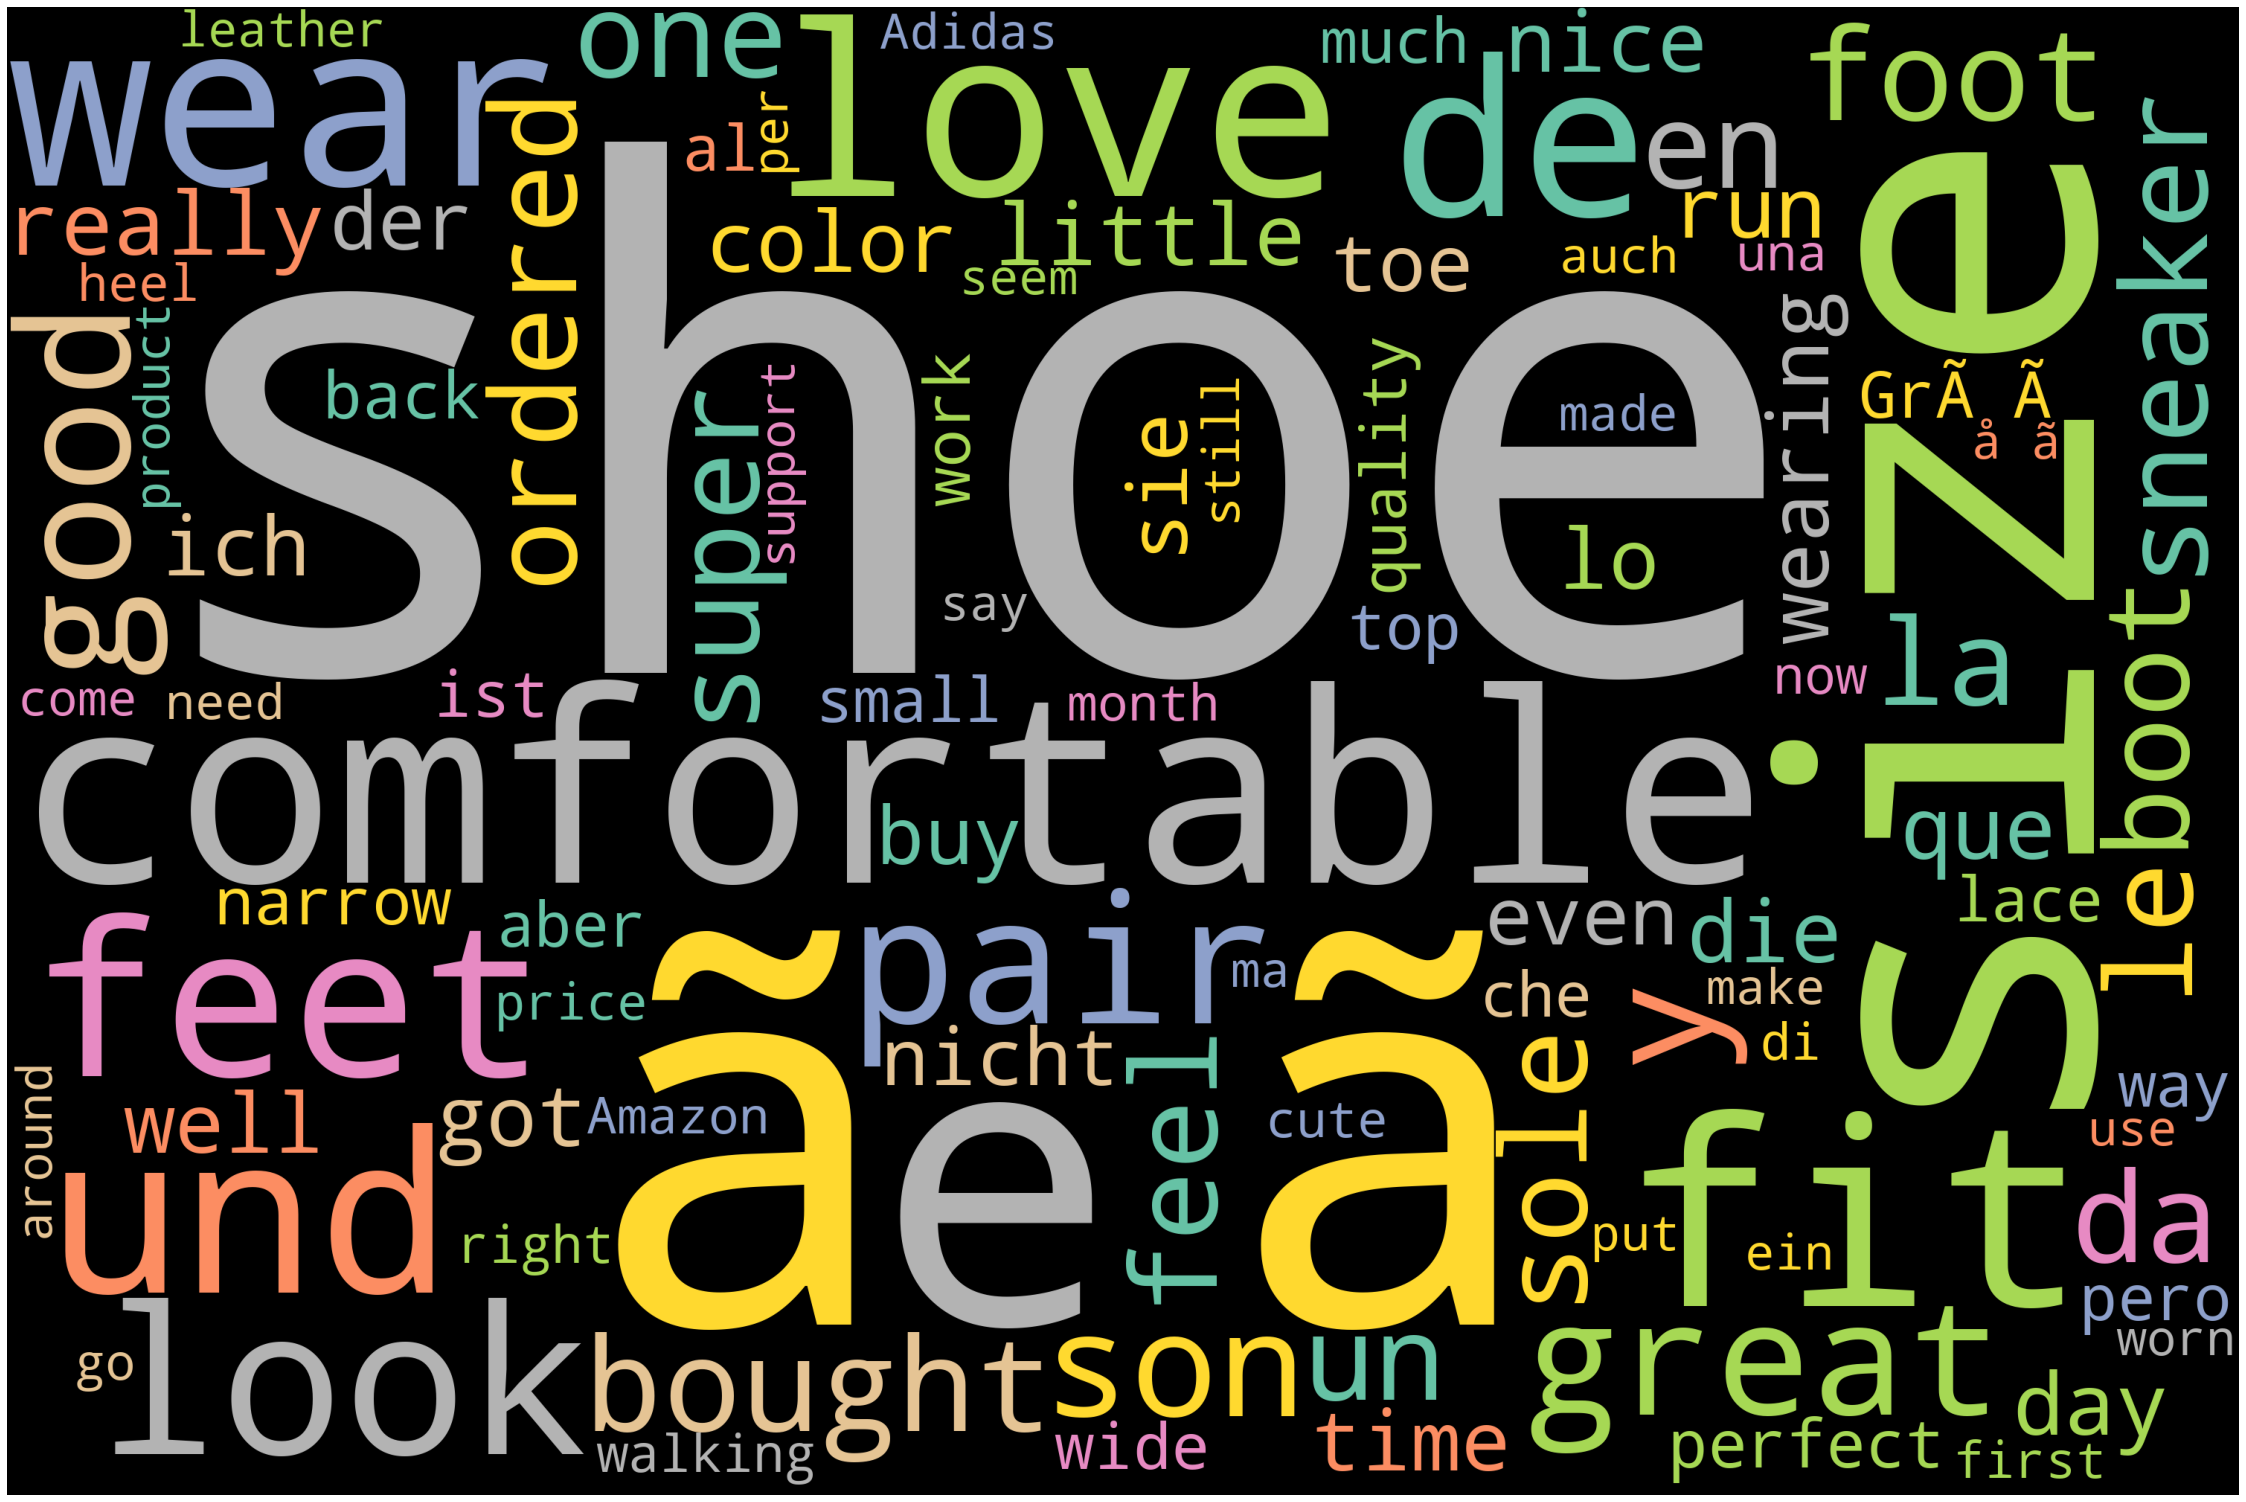

In [66]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Emotion Mining

In [67]:
#Sentiment Analysis
afinn=pd.read_csv("Afinn.csv",sep=',',encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [68]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [69]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentence=tokenize.sent_tokenize(" ".join(reviews))
sentence[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['They could have ripped bc I was wearing them to work and I do a lot of walking at work.',
 'If youâ\x80\x99re going to buy these I donâ\x80\x99t recommend wearing them on days where you will do a lot of walking or they might rip Good quality Great Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora piÃ¹ belle, il mio numero Ã¨ 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco Ã¨ arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in piÃ¹.',
 'Sono solita comprare scarpe Guess e non ho mai avuto problemi con la taglia, in questo caso, invece, mi sono arrivate delle scarpe che, nonostante fossero il solito numero che prendo, sono molto piccole, sembra quasi due numeri meno, quindi immettibili Le scarpe sono molto belle, calzano perfettamente Semplicemente perfette.',
 'Io uso plantari su misura per piede piatto, e dentro queste scarpe ci stanno perfettamente.',
 'La

In [70]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,Love these.
1,Was looking for converses and these were half ...
2,The plastic takes a little getting used to but...
3,"The shoes are very cute, but after the 2nd day..."
4,After the 3rd day of wearing them the plastic ...
...,...
7471,Fits true to size.
7472,There great ð The footbed is very firm.
7473,Returned these to get something with memory foam.
7474,Unlike other UGG slippers I've purchased this ...


In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [72]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [73]:
calculate_sentiment(text = 'amazing') 

4

In [74]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [75]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     2
1    23
2    15
3    17
4    13
5    20
6    87
7    50
8    15
9    11
Name: word_count, dtype: int64

In [76]:
sent_df

,sentence,sentiment_value,word_count
0,Love these.,3,2
1,Was looking for converses and these were half ...,7,23
2,The plastic takes a little getting used to but...,2,15
3,"The shoes are very cute, but after the 2nd day...",2,17
4,After the 3rd day of wearing them the plastic ...,0,13
...,...,...,...
7471,Fits true to size.,1,4
7472,There great ð The footbed is very firm.,3,8
7473,Returned these to get something with memory foam.,0,8
7474,Unlike other UGG slippers I've purchased this ...,2,14


In [77]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
3601,She absolutely loves these shoes Fit great Goo...,14,14
3737,"Quedan muy bien con la ropa, baratas y con cal...",14,30
6116,"Scarpe comode e belle, le consiglio davvero Un...",15,89
3764,Awesome quality fit perfect my son loves them ...,17,58
3465,âMy New Lightweight Sneakers â I a size 8 ...,17,83
5881,Yo quisiera la misma bota zai (10) y el mismo ...,17,79
2695,My two-year-old grandson loves them doesn't wa...,18,54
1893,Was a little bit bigger than expected but stil...,22,47
6189,Para mÃ­ gusto son pesados I have to wear more...,27,78
90,I thought they were really cute and fit good b...,35,236


In [78]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    7476.000000
mean        1.079187
std         2.664297
min       -18.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        35.000000
Name: sentiment_value, dtype: float64

In [79]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
4,After the 3rd day of wearing them the plastic ...,0,13
5,They could have ripped bc I was wearing them t...,0,20
7,Sono solita comprare scarpe Guess e non ho mai...,0,50
8,"Io uso plantari su misura per piede piatto, e ...",0,15
9,La scarpa Ã¨ comoda e da una buona stabilitÃ ...,0,11


In [80]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

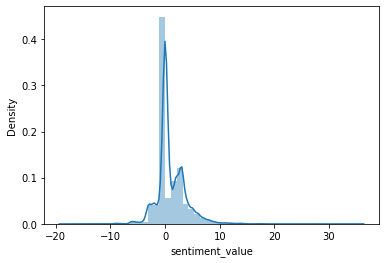

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

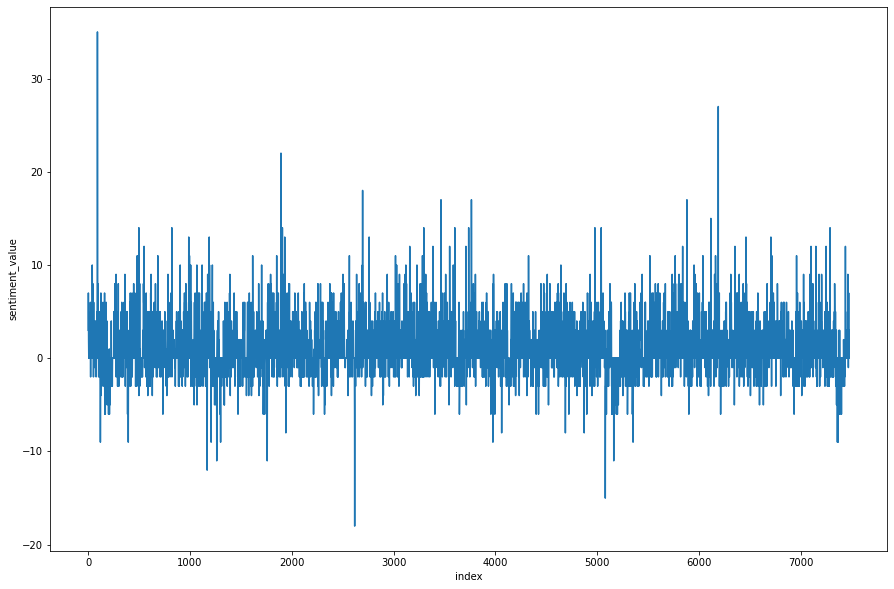

In [82]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)